In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from datasets.clock import ClockConfig
from vis import load_model_script, load_model_state_dict, visualize_latent, visualize_predictions, visualize_reconstruction, print_model_parameters
from train_utils.train import get_dataloaders
from models.autoencoders import MLPResnetAutoencoder

data_config=ClockConfig(
    minute_hand_len=1,
    minute_hand_start=0,
    miute_hand_thickness=0.05,
    hour_hand_len=0.5,
    hour_hand_start=0,
    hour_hand_thickness=0.1
)

IMG_SIZE=128
BATCH_SIZE=64

dataloader, val_dataloader, _, _ = get_dataloaders(
  data_config,
  data_size=2**12,
  img_size=IMG_SIZE,
  batch_size=BATCH_SIZE,
)

LATENT_DIM=2
type_ = "autoencoder"
model = load_model_state_dict(
  model_class = MLPResnetAutoencoder,
  img_size=IMG_SIZE,
  latent_dim=LATENT_DIM,
  model_args=dict(
    encoder_args=dict(
      resnet_start_channels=384,
      fc_size=1024,
      conv_start_channels=64,
      activation='sigmoid',
    ),
  ),
  name="MLPResnetAutoencoder",
  postfix="d21",
  # checkpoint=8
)


In [4]:
from models.decoders import ResNetDecoder3, ResNetDecoder2, ResNetDecoder
print_model_parameters(
  ResNetDecoder2,
  IMG_SIZE, LATENT_DIM
)

Layer                                       Param Count
------------------------------------------------------------
fc.0.weight                                       32768
fc.0.bias                                         16384
decoder_conv.0.upsample1.0.bias                     128
decoder_conv.0.upsample1.0.weight_orig           524288
decoder_conv.0.upsample1.1.weight                   128
decoder_conv.0.upsample1.1.bias                     128
decoder_conv.0.upsample1.3.bias                     128
decoder_conv.0.upsample1.3.weight_orig           147456
decoder_conv.0.upsample1.4.weight                   128
decoder_conv.0.upsample1.4.bias                     128
decoder_conv.0.upsample2.0.bias                     128
decoder_conv.0.upsample2.0.weight_orig           262144
decoder_conv.0.upsample2.1.weight                   128
decoder_conv.0.upsample2.1.bias                     128
decoder_conv.0.upsample2.3.bias                     128
decoder_conv.0.upsample2.3.weight_orig     

# Encoders

In [3]:
visualize_predictions(type_, model, dataloader, latent_dim=LATENT_DIM)

Not encoder


# Decoders

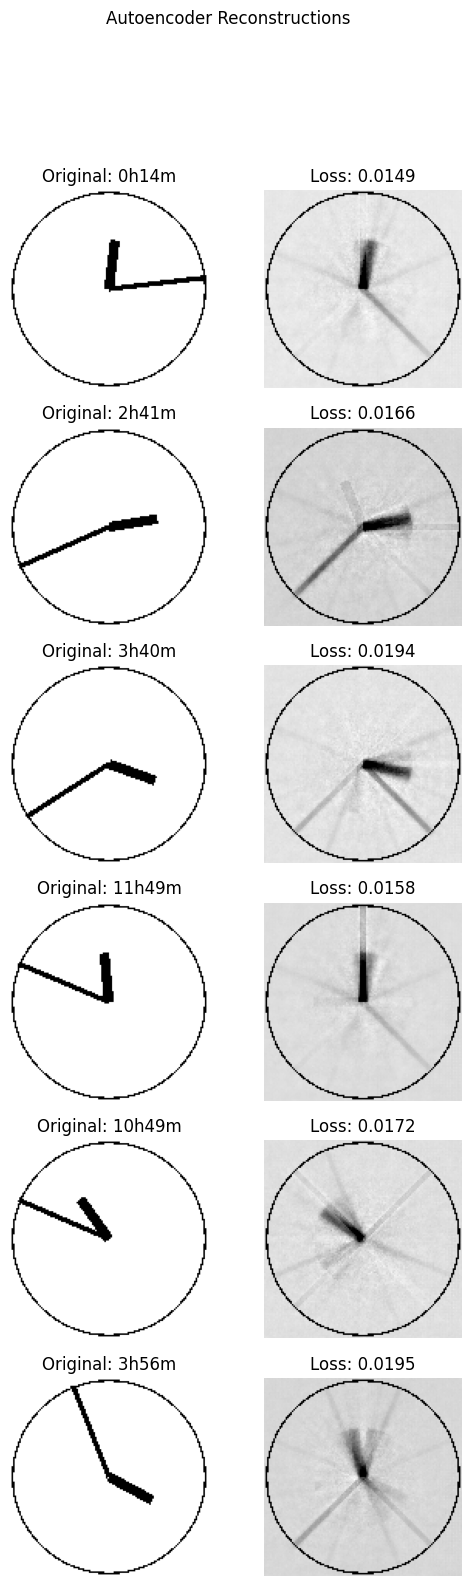

In [4]:
visualize_reconstruction(type_, model, dataloader, latent_dim=LATENT_DIM)

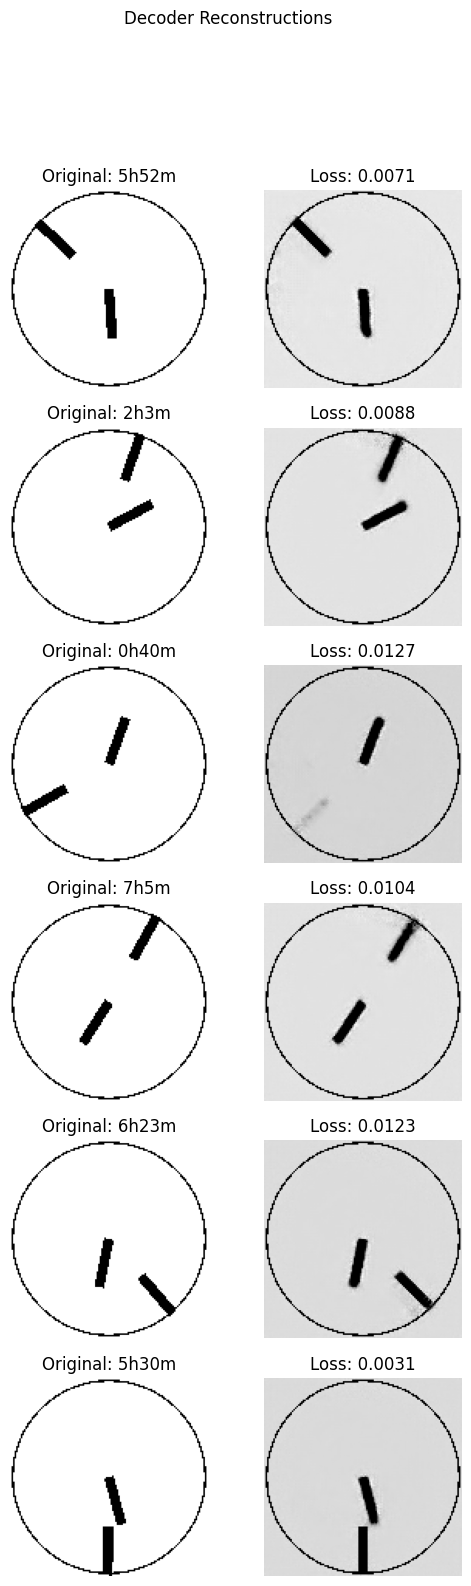

# Autoencoders

plotting


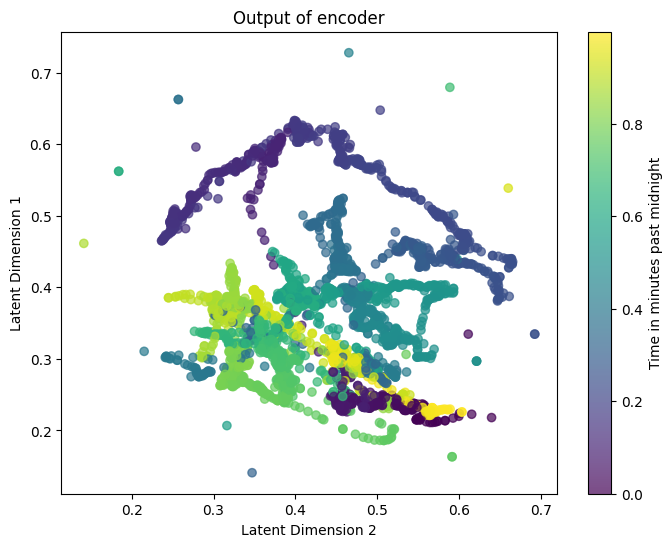

In [14]:
model = load_model_state_dict(
  model_class = MLPResnetAutoencoder,
  img_size=IMG_SIZE,
  latent_dim=LATENT_DIM,
  model_args=dict(
    encoder_args=dict(
      resnet_start_channels=384,
      fc_size=1024,
      conv_start_channels=64,
      activation='sigmoid',
    ),
  ),
  name="MLPResnetAutoencoder",
  postfix="d21",
  # checkpoint=8
)

visualize_latent(type_, model, latent_dim=LATENT_DIM, dataloader=dataloader)


plotting


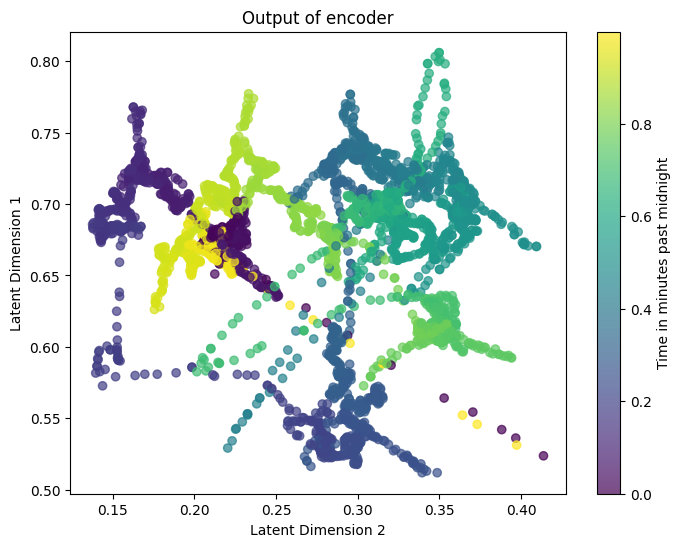

plotting


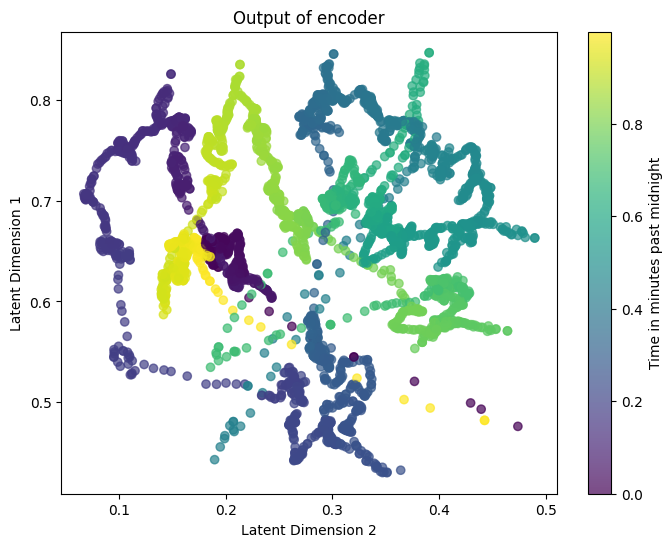

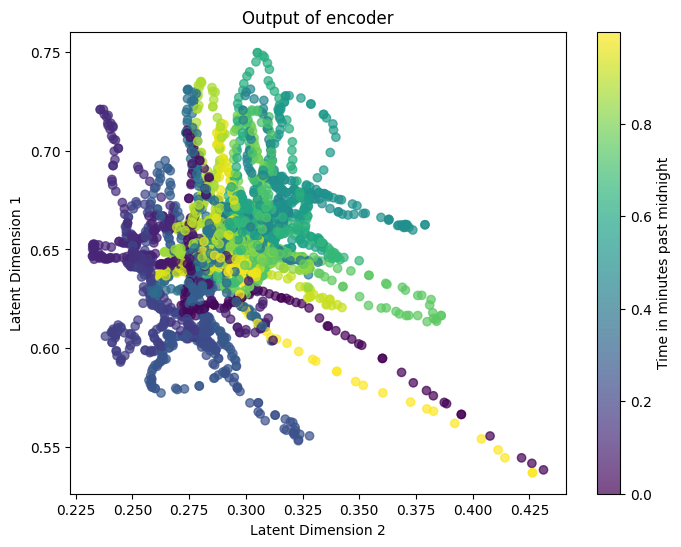